# Seaborn Tutorial

## Setup

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
## Command to setup the notebook
# plot are shown directly inside jupyter notebook
%matplotlib inline
%reload_ext autoreload
%autoreload 2

## Import Data

In [10]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [4]:
crash_df=sns.load_dataset('car_crashes')

In [18]:
crash_df.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


# Distribution Plots

## Distribution Plot
Provides a unique way to look at a univariate distribution. A univeriate distribution provides a distribution for one variable.<br>__Kernal Density Estimation__ with a Histogram is provided. By Default kde=False,(removes the KDE)

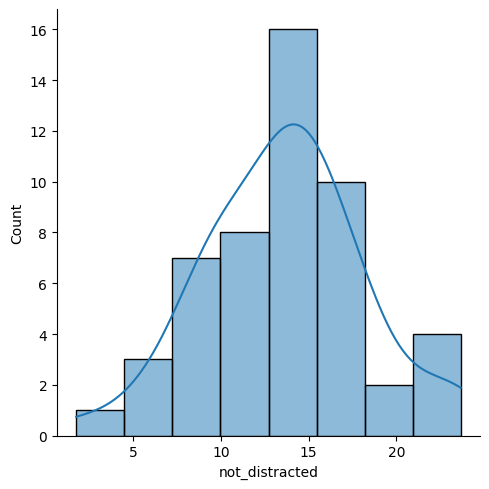

In [17]:
sns.displot(crash_df['not_distracted'], kde=True)

__Bins__ defines how many buckets to divide the data up into between intervals.<br> For e.g., put all profits between \\$10 and \$20 in this bucket.

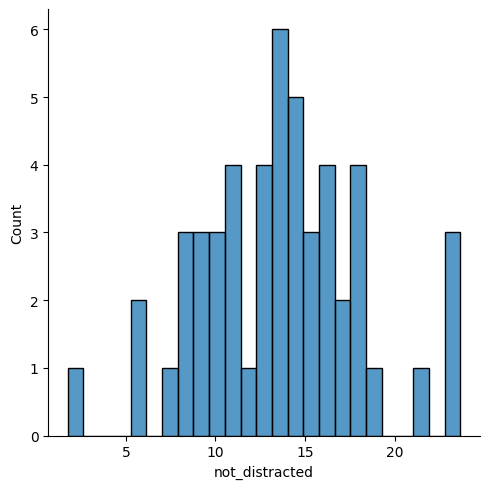

In [20]:
sns.displot(crash_df['not_distracted'], kde=False, bins=25)

## Joint Plot
Joint plot compares 2 distributions and plots a scatter plot by default.<br>As we can see as people tend to speed they also tend to drink and drive.<br> __kind__ param helps can create regression line 'reg', 2D KDE 'kde', hexagon distribution 'hex'

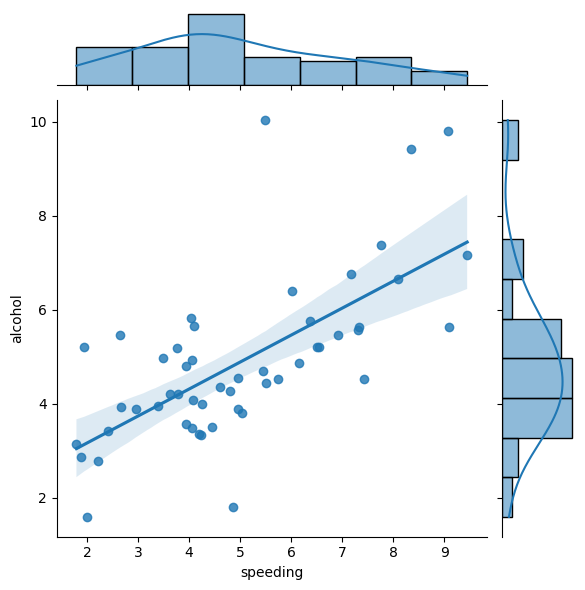

In [21]:
sns.jointplot(x='speeding', y='alcohol', data=crash_df, kind='reg')

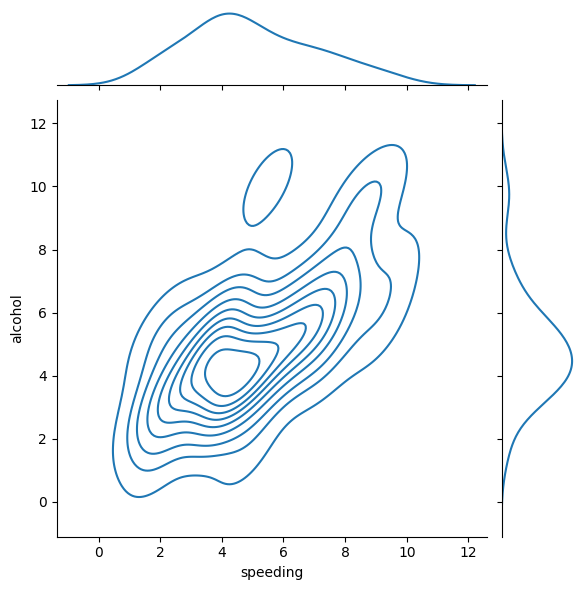

In [22]:
sns.jointplot(x='speeding', y='alcohol', data=crash_df, kind='kde')

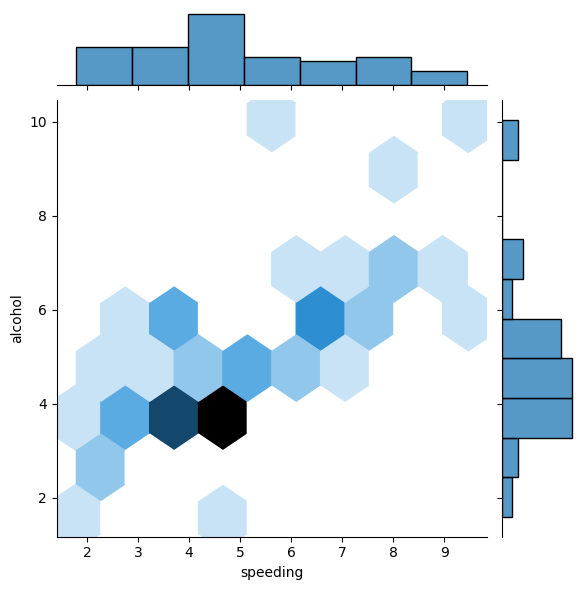

In [23]:
sns.jointplot(x='speeding', y='alcohol', data=crash_df, kind='hex')

## KDE Plot

<Axes: xlabel='alcohol', ylabel='Density'>

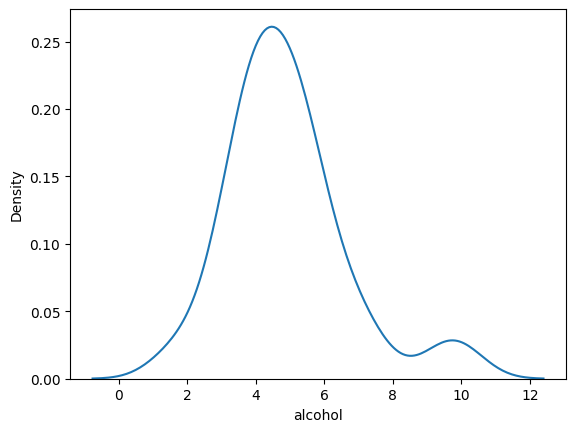

In [5]:
# Get just the KDE Plot
sns.kdeplot(crash_df['alcohol'])

## Pair Plots

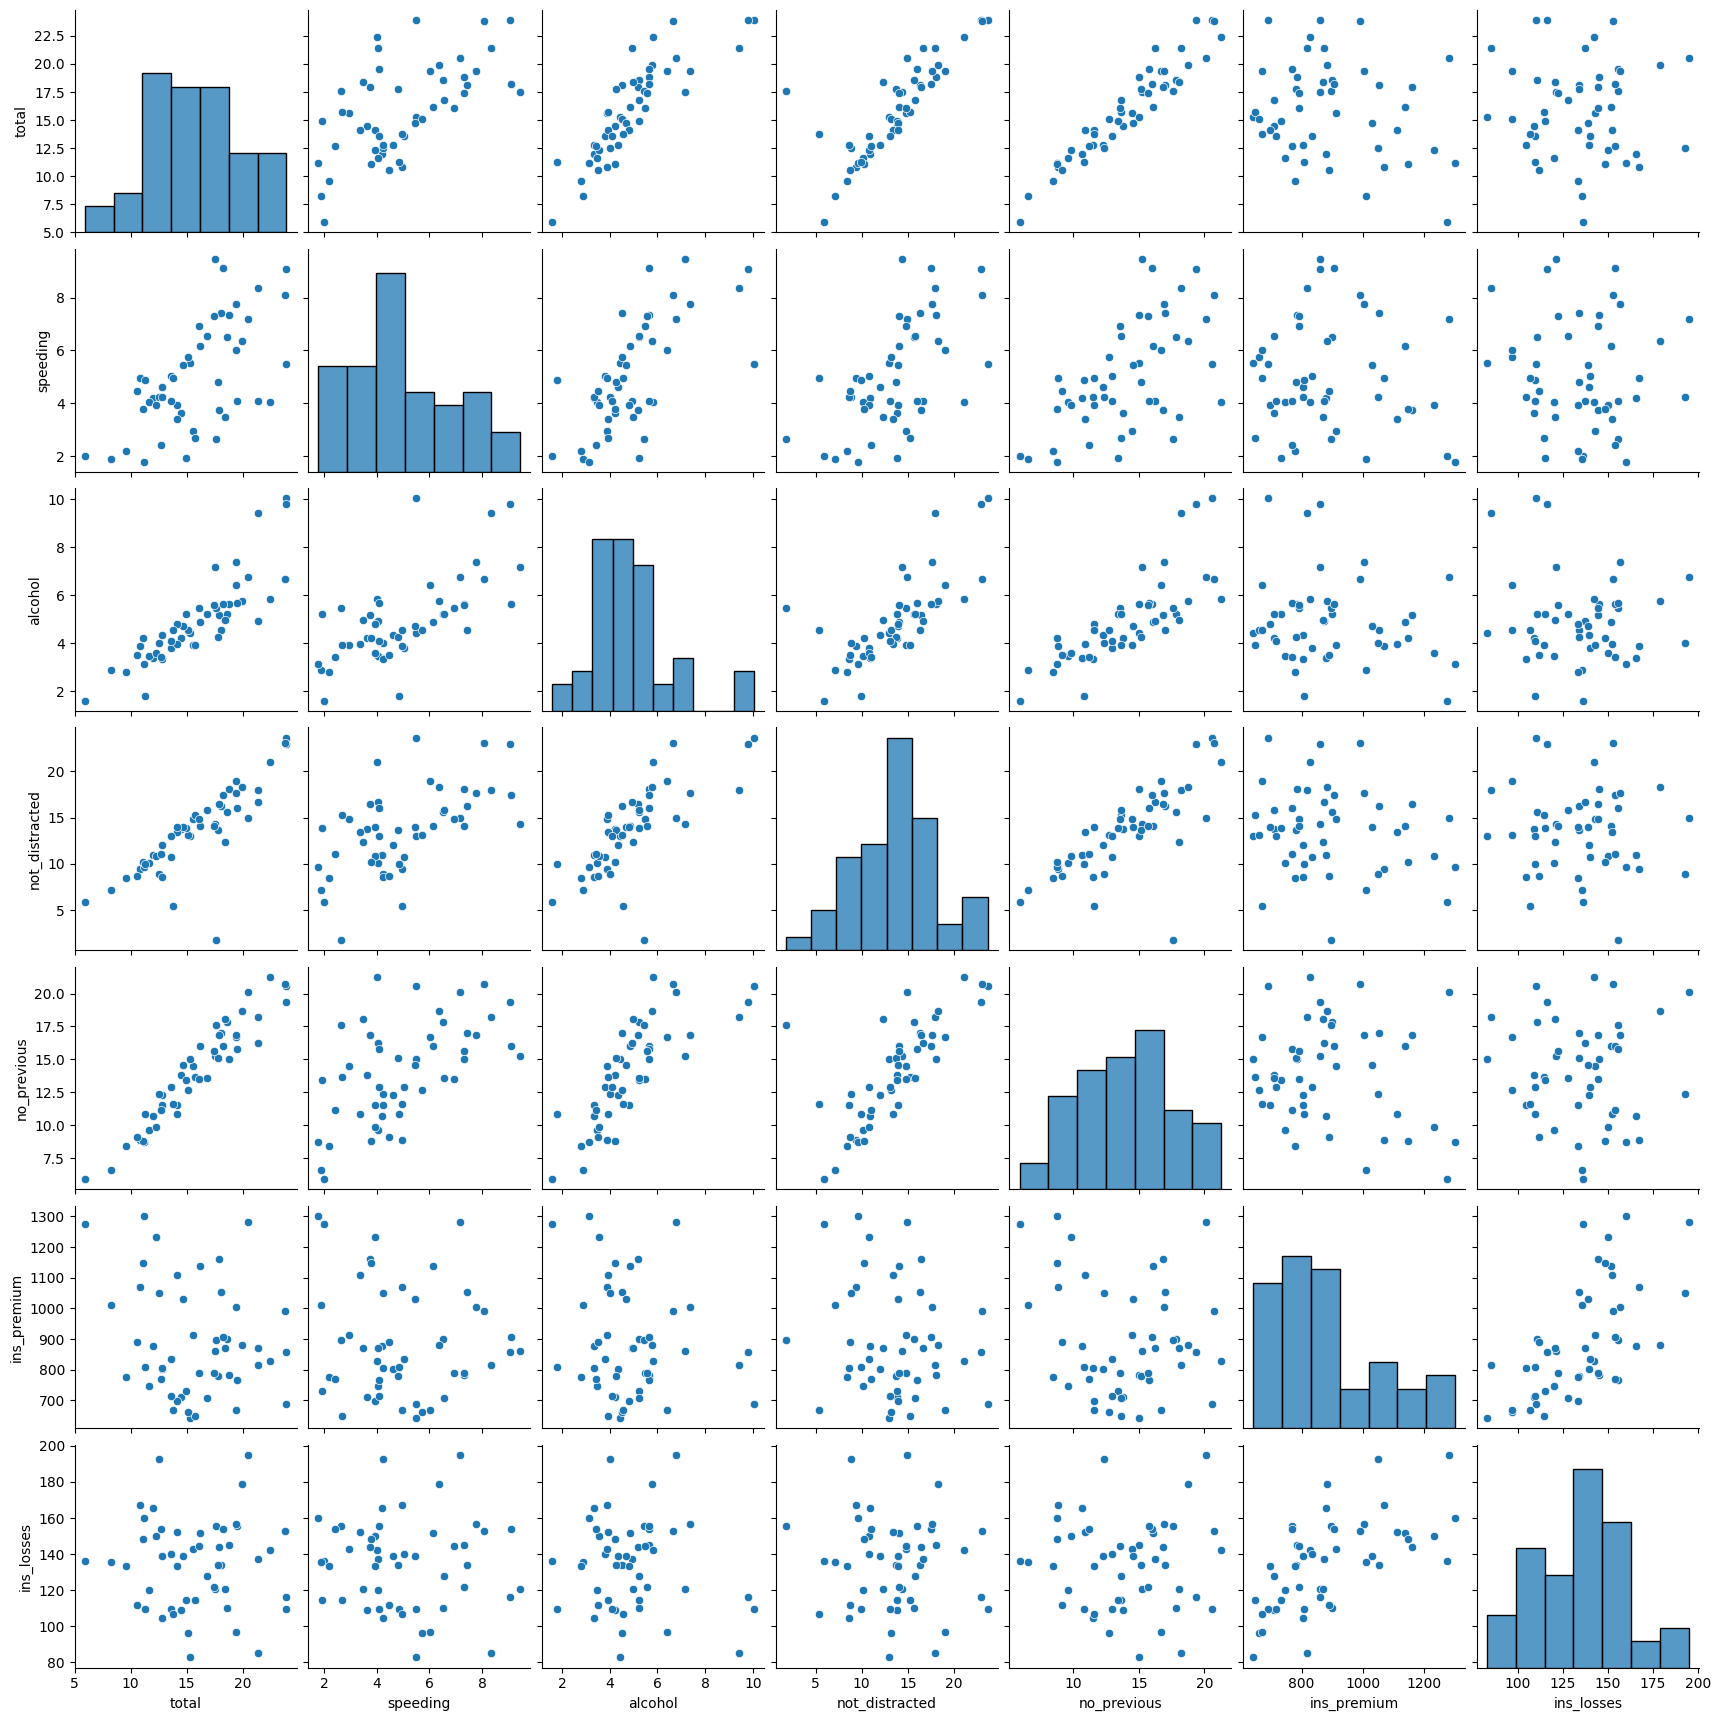

In [6]:
# Pair Plot plots relationships across the entire data frames numercial values
sns.pairplot(crash_df)

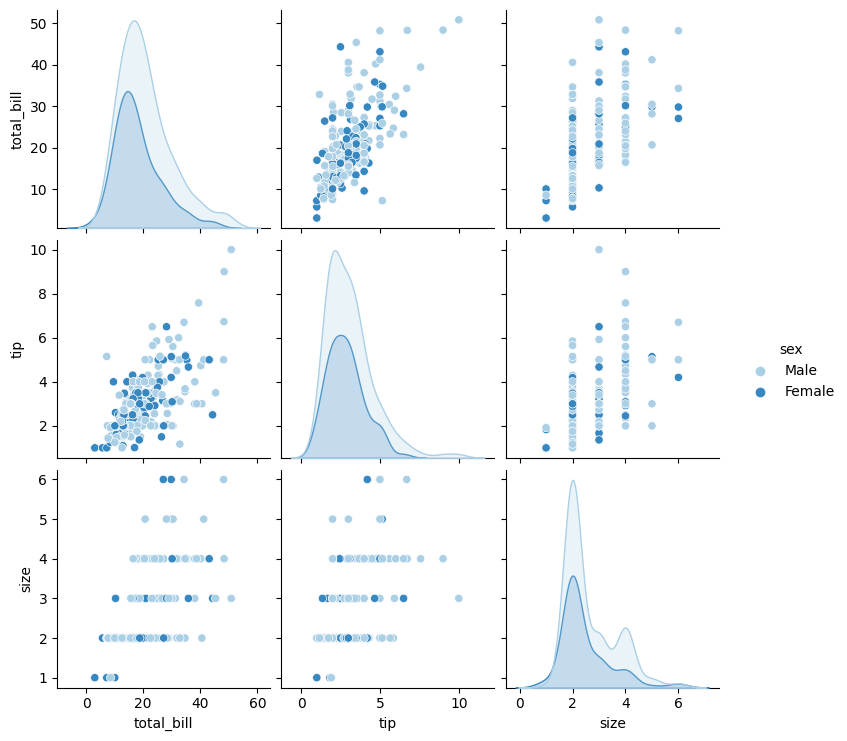

In [12]:
# Load dat on tips
tips_df=sns.load_dataset('tips')
# With hue you can pass in a categorical column and the charts will be colorized.
# You can use color maps from Matplotlip to define what colors to use
sns.pairplot(tips_df, hue='sex', palette='Blues')

## Rug Plots

Plots a single column of datapoints in an array as sticks on an axis, with rug plot you'll see a more dense number of lines where the amount is most common.<br> This is like how a histogram is taller where values are more common.

<Axes: xlabel='tip'>

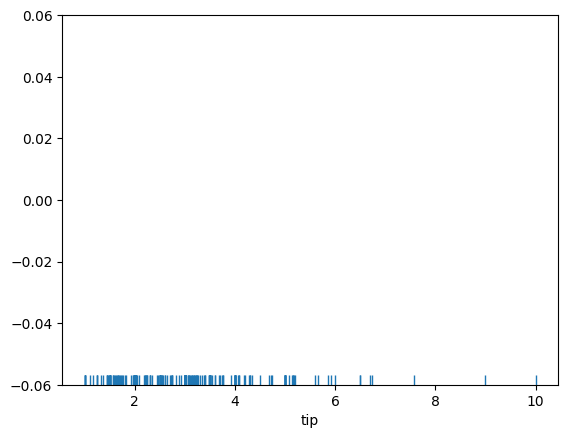

In [11]:
sns.rugplot(tips_df['tip'])

# Styling

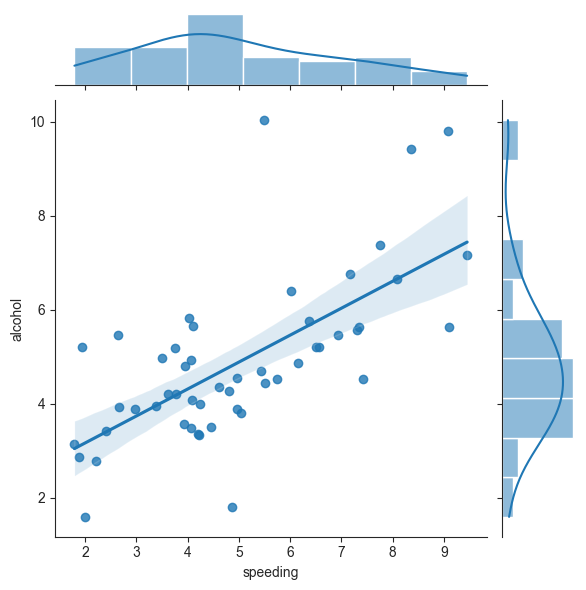

In [22]:
# You can set styling four your axes and grids
# white, darkgrid, whitegrid, dark, ticks
sns.set_style('ticks')
sns.jointplot(x='speeding', y='alcohol', data=crash_df, kind='reg')

<Figure size 800x400 with 0 Axes>

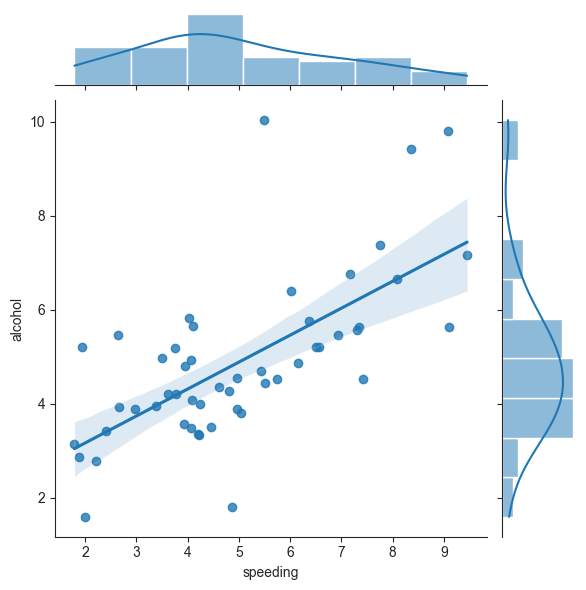

In [23]:
# You can use figure sizing from matplotlip
plt.figure(figsize=(8,4))
sns.jointplot(x='speeding', y='alcohol', data=crash_df, kind='reg')

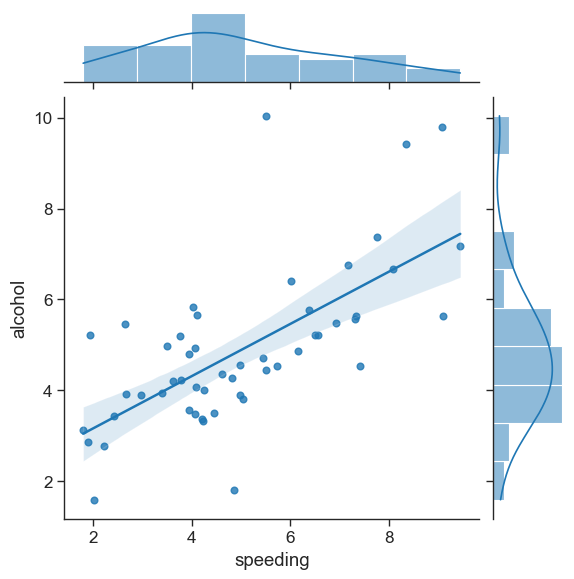

In [28]:
# Change size of lables, lines and other elements to best fit
# How you will present you data (paper, talk, poster)
sns.set_context('paper', font_scale=1.4)
sns.jointplot(x='speeding', y='alcohol', data=crash_df, kind='reg')

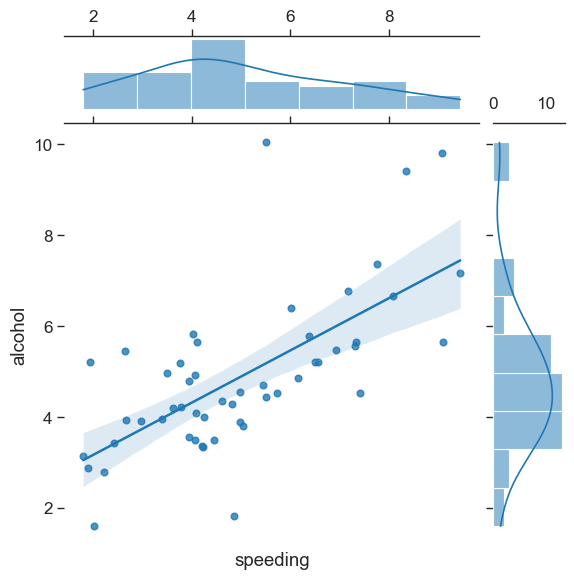

In [33]:
# Get rid of spines
# You can turn off specific spines with right=True, left=True
# boot=True, top=True
sns.jointplot(x='speeding', y='alcohol', data=crash_df, kind='reg')
sns.despine(left=True, bottom=True, top=False)

# Categorical Plots

## Bar Plots
Focus on distributions using categorical data in reference to one of the numerical columns.<br> Aggregate categorical data based on a function (mean is the default)<br>Estimate total bill amount based on sex.<br> With estimator you can define functions to use other than the mean <br> like those provided by NumPy:median, std, var, cov or make your own functions

<Axes: xlabel='sex', ylabel='total_bill'>

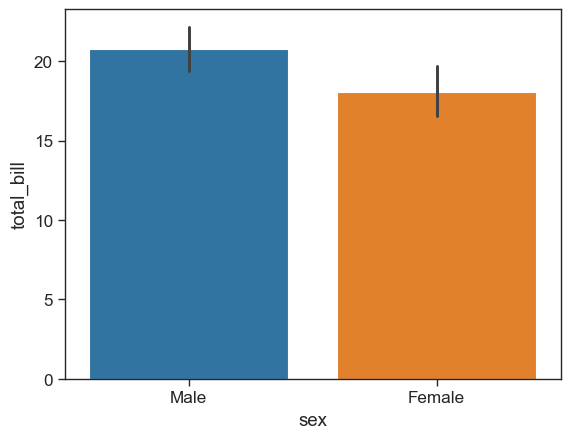

In [34]:
sns.barplot(x='sex', y='total_bill', data=tips_df)

<Axes: xlabel='sex', ylabel='total_bill'>

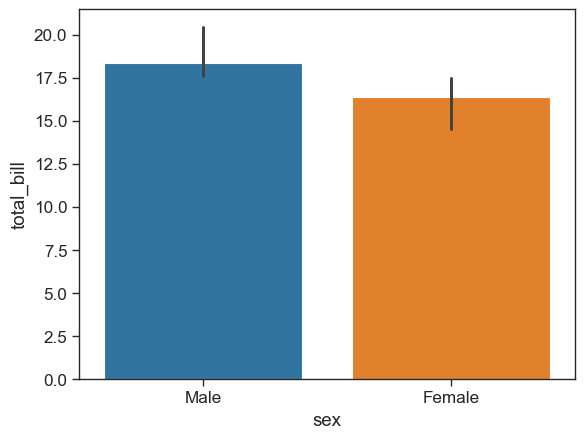

In [36]:
sns.barplot(x='sex', y='total_bill', data=tips_df, estimator=np.median)

## Count Plot
A count plot is like a bar plot, but the estimator is counting the number of occurences

<Axes: xlabel='sex', ylabel='count'>

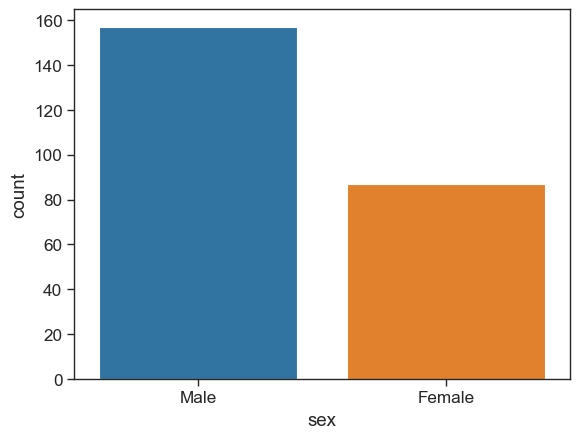

In [37]:
sns.countplot(x='sex', data=tips_df)

## Box Plot
A Box plot allows you to compare different variables.<br> The box shows the quartiles of the data.<br>The bar in the middle is the median and the box extends 1 standard deviation from the median.<br> The whiskers extend to all the other data aside from the points thare are considered to be outliers.<br> Hue can add another category being sex.<br> We can see men spend way more on Friday versus less than women on Saturday.

<Axes: xlabel='day', ylabel='total_bill'>

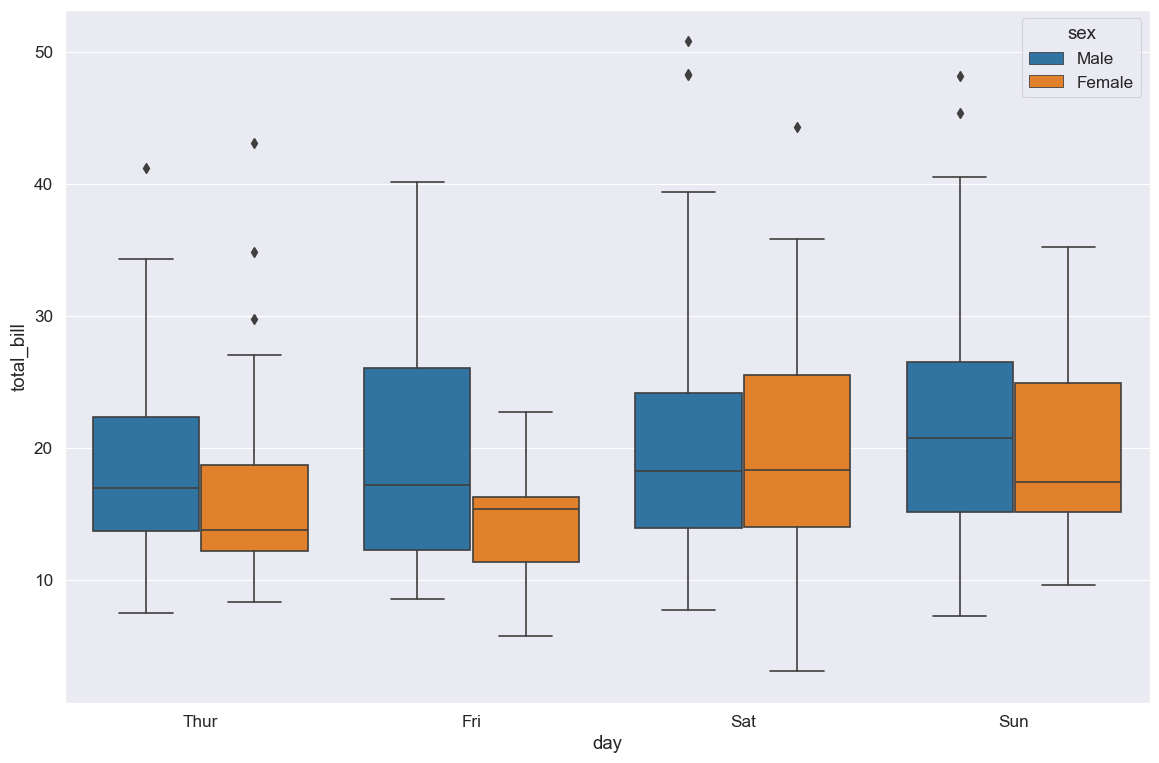

In [38]:
plt.figure(figsize=(14,9))
sns.set_style('darkgrid')
sns.boxplot(x='day', y='total_bill', data=tips_df, hue='sex')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Axes: xlabel='day', ylabel='total_bill'>

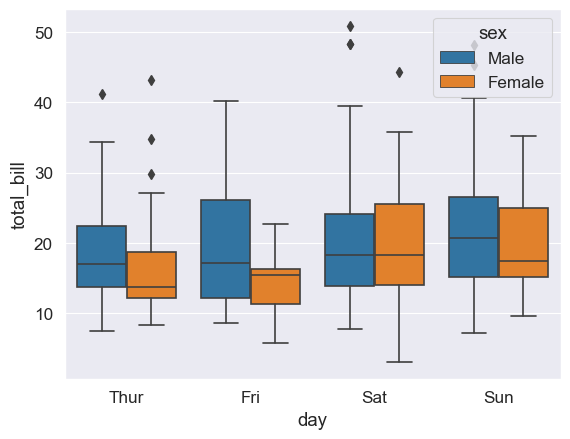

In [40]:
# Moves legend to the best position
plt.legend(loc=0)
sns.boxplot(x='day', y='total_bill', data=tips_df, hue='sex')

## Violin Plot
Violin Plot is a combination of the boxplot and KDE<br> While a box plot corresponds to data points, the violin plot uses the KDE estimation of the data points.<br>Split allows you to compare how the categories compare to each other.

<Axes: xlabel='day', ylabel='total_bill'>

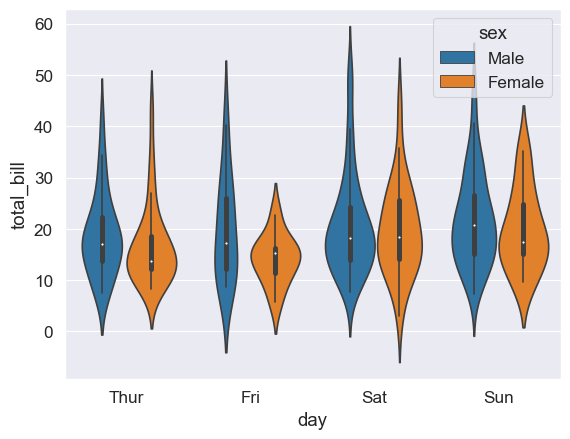

In [41]:
sns.violinplot(x='day', y='total_bill', data=tips_df, hue='sex')

<Axes: xlabel='day', ylabel='total_bill'>

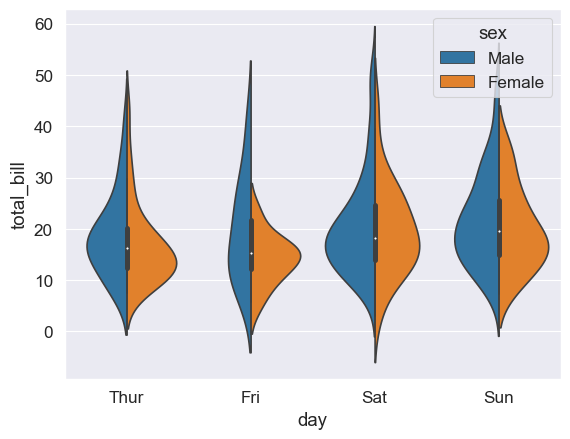

In [42]:
sns.violinplot(x='day', y='total_bill', data=tips_df, hue='sex', split=True)

## Strip Plot
The strip plot draws a scatter plot representing all data points where one variable is categorical.<br> It is often use to show all observations with a box plot that represents the average distribution.

<Axes: xlabel='day', ylabel='total_bill'>

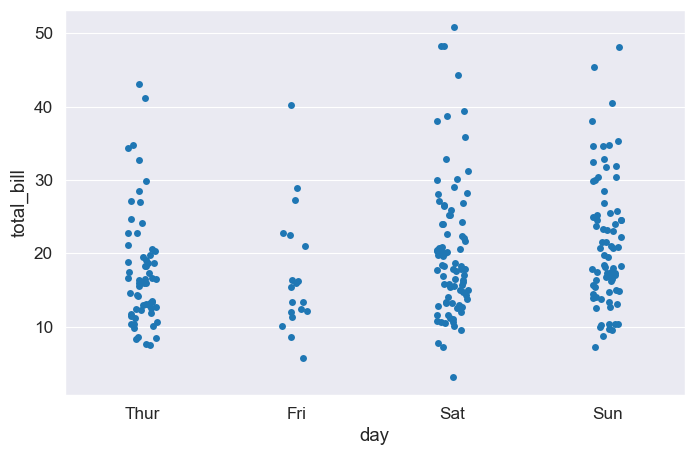

In [44]:
plt.figure(figsize=(8,5))
sns.stripplot(x='day', y='total_bill', data=tips_df)

Jitter spreads data points out so that they aren't stacked on top of each other

<Axes: xlabel='day', ylabel='total_bill'>

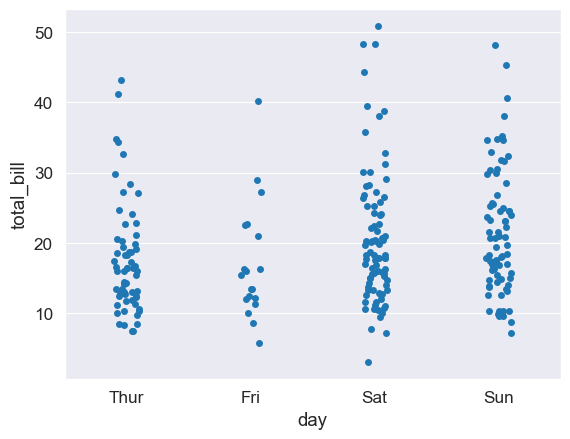

In [45]:
sns.stripplot(x='day', y='total_bill', data=tips_df, jitter=True)

Hue breaks data into men and women

<Axes: xlabel='day', ylabel='total_bill'>

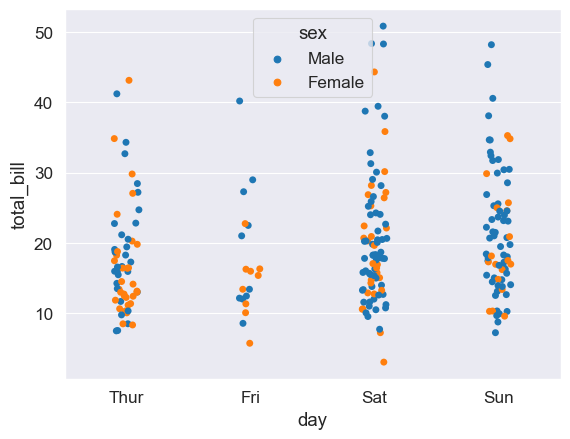

In [46]:
sns.stripplot(x='day', y='total_bill', data=tips_df, jitter=True, hue='sex')

Dodge separates the men and women data

<Axes: xlabel='day', ylabel='total_bill'>

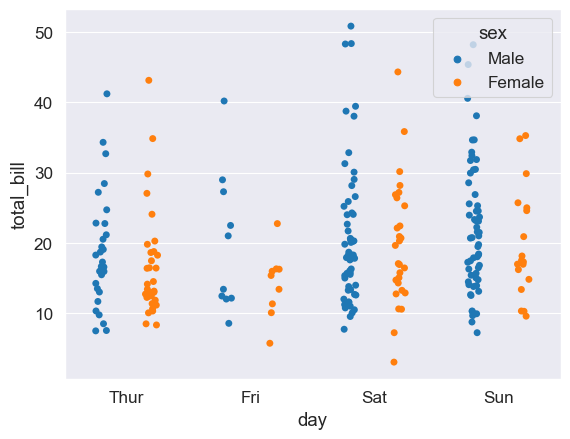

In [47]:
sns.stripplot(x='day', y='total_bill', data=tips_df, jitter=True, hue='sex', dodge=True)

## Swarm Plot
A Swarm plot is like a strip plot, but points are adjusted so they don't overlap.<br> It looks like a combination of the violin and strip plots

<Axes: xlabel='day', ylabel='total_bill'>

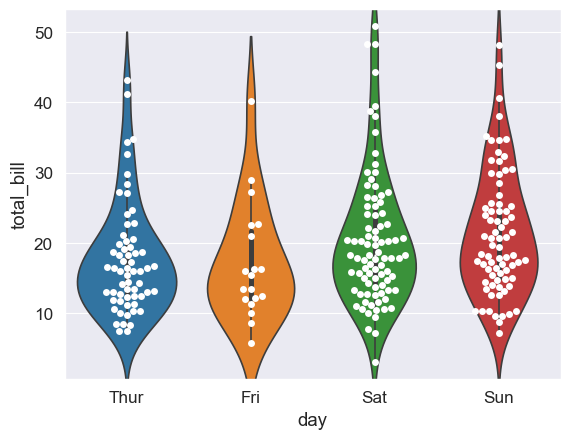

In [53]:
# You can stack a violin plot with the swarm
sns.violinplot(x='day', y='total_bill', data=tips_df)
sns.swarmplot(x='day', y='total_bill', data=tips_df, color='white')

In [54]:
# Palettes

<Axes: xlabel='day', ylabel='total_bill'>

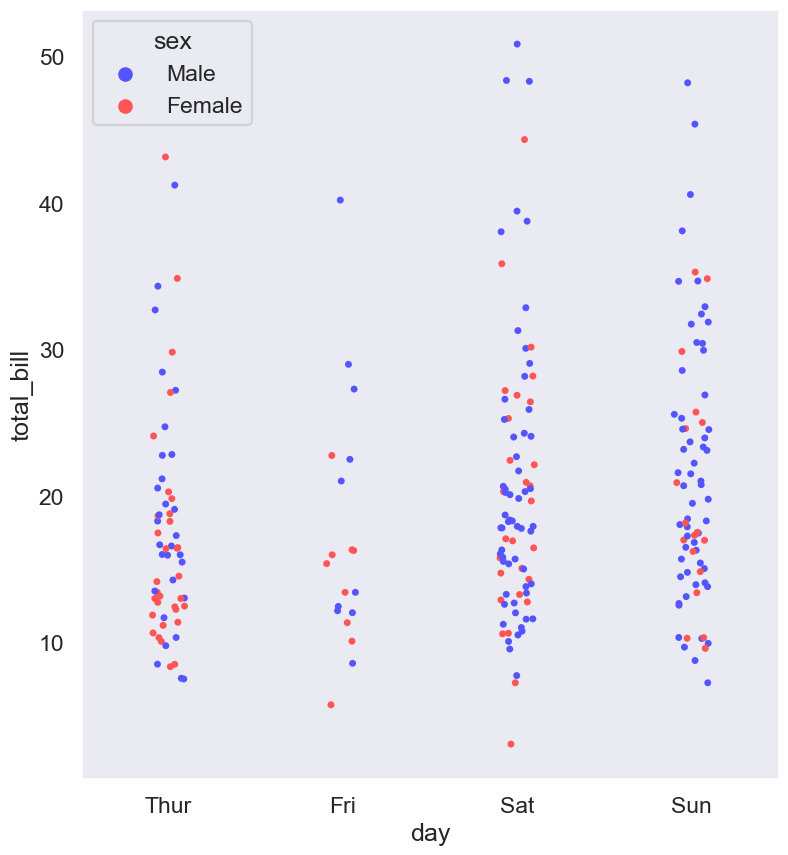

In [58]:
plt.figure(figsize=(9,10))
sns.set_style('dark')
sns.set_context('talk')
sns.stripplot(x='day', y='total_bill', data=tips_df, hue='sex', palette='seismic')

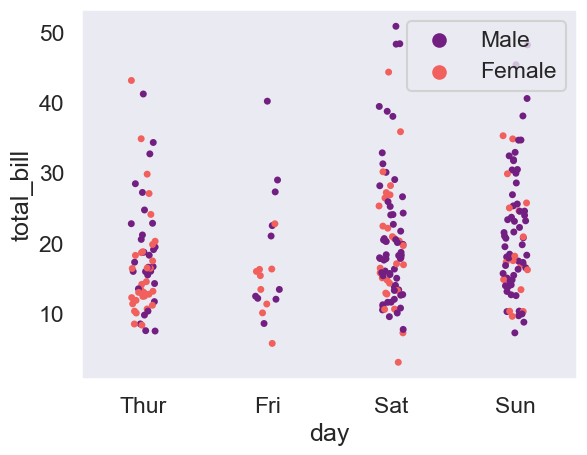

In [61]:
sns.stripplot(x='day', y='total_bill', data=tips_df, hue='sex', palette='magma')
# Add the optional legend with a location number
# (best:0, upper right:1, upper left: 2, lower left:3, lower right:4)
# or supply a tuple of x & y from lower left
plt.legend(loc=1)